In [1]:
import os
import numpy as np
import efficientnet.tfkeras
from tensorflow.keras.models import load_model
import pandas as pd
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [2]:
model_dir = '/media/tohn/SSD/ModelTrainByImages/R2_1/models/B5R2_block5_15AB_1FC_3.h5'
model = load_model(model_dir)
height = width = model.input_shape[1]

import pandas as pd
base_dir  = '/media/tohn/SSD/Images/Image1/validation/'
dataframe = pd.read_csv( '/home/yupaporn/codes/USAI/Validationdf_fold1_3.csv')
validation_dir = os.path.join(base_dir, 'validation')

#Train
train_df = pd.read_csv( '/home/yupaporn/codes/USAI/Traindf_fold1_3.csv')
base_dir0 = '/media/tohn/SSD/Images/Image1/'
os.chdir(base_dir0)
train_dir = os.path.join(base_dir0, 'train')

import pandas as pd
df0 = pd.read_csv (r'/home/yupaporn/codes/USAI/Testdf.csv')
print(df0 .shape)
dataframe = df0[(df0['Path Crop']!='None' )&(df0['Path Crop']!='Nan')]

batch_size = 64
epochs = 10

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.2,
      height_shift_range=0.2,
      brightness_range=[0.5,1.5],
      shear_range=0.4,
      zoom_range=0.2,
      horizontal_flip=False,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_dataframe(
        dataframe = dataframe,
        directory = train_dir,
        x_col = 'Path Crop',
        y_col = 'Sub_class',
        target_size = (height, width),
        batch_size=batch_size,
        color_mode= 'rgb',
        class_mode='categorical')

#label
labels = (train_generator.class_indices)
labels = dict((v,k.replace("C","")) for k,v in labels.items())
print(labels)

(1312, 22)
Found 1312 validated image filenames belonging to 15 classes.
{0: 'AB01', 1: 'AB02', 2: 'AB03', 3: 'AB04', 4: 'AB05', 5: 'AB06', 6: 'AB07', 7: 'AB081', 8: 'AB082', 9: 'AB083', 10: 'AB09', 11: 'AB10', 12: 'AB11', 13: 'AB12', 14: 'Normal'}


In [3]:
from tensorflow.keras.preprocessing import image
def predict_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width))
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)
    # Reshape
    x = x.reshape((1,) + x.shape)
    x /= 255.
    result = model.predict([x])
    
    return result[0]

#Predict
pred_list = list()
prob_list = list()
probAll_list = list()
img_path=dataframe['Path Crop'].tolist()
for i in range(0,len(img_path)):
    predict = predict_image(img_path[i])
    result = np.argmax(predict)
    pred_list.append(labels[result])
    prob_list.append(predict[result])
    probAll_list.append(list(predict))

dataframe['category'] = list(pred_list)
dataframe['Prob'] = prob_list
dataframe['15AB_ProbAll'] = probAll_list

In [4]:
dataframe.head(5)

,Unnamed: 0,Unnamed: 0.1,Case,Abs Position,Sub Position,Class,Sub_class,Path Full,Path Crop,Views,...,width,height,Rleft,Rtop,Rwidth,Rheight,filename,category,Prob,15AB_ProbAll
0,111,111,40,P1,P1,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,...,477.0,311.0,0.092664,0.148873,0.513514,0.346614,AB01 P1 C040.JPG,Normal,0.958334,"[0.012282645, 0.029382633, 1.2064291e-09, 5.28..."
1,112,112,40,P2,P2,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,...,532.0,385.0,0.171698,0.154849,0.560377,0.428287,AB01 P2 C040.JPG,AB01,0.999923,"[0.9999229, 1.9924648e-05, 1.903762e-12, 6.713..."
2,113,113,40,P4,P41,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,...,605.0,640.0,0.140316,0.150865,0.667984,0.711155,AB01 P4-1 C040.JPG,AB02,0.932384,"[0.06761552, 0.93238425, 4.7395426e-13, 1.2386..."
3,114,114,40,P5,P51,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-C,...,643.0,587.0,0.063462,0.107041,0.690385,0.653386,AB01 P5-1 C040.JPG,AB01,0.758289,"[0.7582886, 0.2416054, 2.5754787e-08, 3.833686..."
4,115,115,40,P3,P31,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,...,618.0,562.0,0.216374,0.146881,0.672515,0.625498,AB01 P3-1 C040.JPG,AB02,0.995623,"[0.004377208, 0.9956226, 9.943128e-09, 9.31797..."


In [5]:
os.chdir( '/home/yupaporn/codes/result_model')
testdf = dataframe
# testdf.to_csv('ResultEffNet_15AB_Testset_1FC_3_.csv')

### EffNet model

In [6]:
Eff=testdf

In [25]:
ProbAll = Eff['15AB_ProbAll'].tolist()
ab_prob_ = []
for i in ProbAll:
    ab = abs(1- i[14])
    ab_prob_.append(ab)

In [38]:
# threshold = range(0,0.0001,1,)

import numpy as np
threshold = np.arange(0, 1.0001, 0.0001).tolist()


In [39]:
# j = 0
# pre_ = []
# for i in ab_prob_:
#     if i  >=j:
#         pre_.append(1)
#     else:
#         pre_.append(0) 
# tn, fp, fn, tp = confusion_matrix(Class, pre_).ravel()
# print(tn, fp, fn, tp )

In [40]:
category = Eff['category'].map({'AB12':1, 'AB04':1, 'AB05':1, 'Normal':0, 'AB02':1, 'AB11':1, 'AB082':1, 'AB06':1,'AB07':1, 'AB081':1, 'AB09':1, 'AB03':1, 'AB10':1, 'AB01':1, 'AB083':1}).values
Class= Eff['Class'].map({'Abnormal':1, 'Normal':0}).values
#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
resdf = []
# threshold = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
TP, FP, TN, FN, Acc, Recall, Precision, TPR, FPR, SPEC, FNR, WL= [], [], [], [], [], [], [], [], [], [], [], []
# Class= Eff['Class'].map({'Abnormal':1, 'Normal':0}).values
for j in threshold:
    pre_ = []
    for i in ab_prob_:
        if i  >= j:
            pre_.append(1)
        else:
            pre_.append(0) 
    tn, fp, fn, tp = confusion_matrix(Class, pre_).ravel()
    pre = tp/(tp+fp)
    re= tp/(tp+fn)
    acc = (tp+tn)/(tp+tn+fp+fn)
    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)
    spec = 1-(tn/(tn+fp))
    fnr = 1-(tp/(tp+fn)) 
    wl = (fp+tp)/(tp+tn+fp+fn)
    resdf.append({'Threshold' : j,'TP' : tp,'FP' : fp,'TN' : tn,'FN' : fn, 'Acc' : acc, 'TPR' : tpr, 'FPR' : fpr, 'FNR' : fnr, 'SPEC' : spec, 'WL' : wl})
res_df = pd.DataFrame(resdf)
fix_value = [{'Threshold' : 0,'TP' :0,'FP' :0 ,'TN' : 0,'FN' : 0, 'Acc' : 0, 'TPR' : 1, 'FPR' : 1, 'FNR' : 0, 'SPEC' : 1, 'WL' : 1}]
res_df = res_df.append(fix_value,ignore_index=True,sort=False)
res_df = res_df.apply(np.roll, shift=1)
res_df

,Threshold,TP,FP,TN,FN,Acc,TPR,FPR,FNR,SPEC,WL
0,0.0000,0,0,0,0,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
1,0.0000,455,857,0,0,0.346799,1.000000,1.000000,0.000000,1.000000,1.000000
2,0.0001,415,28,829,40,0.948171,0.912088,0.032672,0.087912,0.032672,0.337652
3,0.0002,410,24,833,45,0.947409,0.901099,0.028005,0.098901,0.028005,0.330793
4,0.0003,410,21,836,45,0.949695,0.901099,0.024504,0.098901,0.024504,0.328506
...,...,...,...,...,...,...,...,...,...,...,...
9997,0.9996,293,0,857,162,0.876524,0.643956,0.000000,0.356044,0.000000,0.223323
9998,0.9997,291,0,857,164,0.875000,0.639560,0.000000,0.360440,0.000000,0.221799
9999,0.9998,288,0,857,167,0.872713,0.632967,0.000000,0.367033,0.000000,0.219512
10000,0.9999,279,0,857,176,0.865854,0.613187,0.000000,0.386813,0.000000,0.212652


In [41]:
FNR = res_df.FNR
WL = res_df.WL

from sklearn.metrics import auc
area = auc(FNR, 1-WL)
print("Area Under Curve: %0.2f" % area)

Area Under Curve: 0.79


In [42]:
#Select the best threshold
FN_min = res_df[res_df.FN == res_df.FN.min()]
FP_min = FN_min[FN_min.FP == FN_min.FP.min()]
FP_min

,Threshold,TP,FP,TN,FN,Acc,TPR,FPR,FNR,SPEC,WL
0,0.0,0,0,0,0,0.0,1.0,1.0,0.0,1.0,1.0


In [43]:
FN_min = res_df[(res_df.FN != 0)]
FN_min_ = FN_min[FN_min.FN == FN_min.FN.min()]
FN_min__ = FN_min_[FN_min_.FP == FN_min_.FP.min()]
FN_min__

,Threshold,TP,FP,TN,FN,Acc,TPR,FPR,FNR,SPEC,WL
2,0.0001,415,28,829,40,0.948171,0.912088,0.032672,0.087912,0.032672,0.337652
3,0.0002,410,24,833,45,0.947409,0.901099,0.028005,0.098901,0.028005,0.330793
4,0.0003,410,21,836,45,0.949695,0.901099,0.024504,0.098901,0.024504,0.328506
5,0.0004,410,19,838,45,0.951220,0.901099,0.022170,0.098901,0.022170,0.326982
6,0.0005,408,18,839,47,0.950457,0.896703,0.021004,0.103297,0.021004,0.324695
...,...,...,...,...,...,...,...,...,...,...,...
9997,0.9996,293,0,857,162,0.876524,0.643956,0.000000,0.356044,0.000000,0.223323
9998,0.9997,291,0,857,164,0.875000,0.639560,0.000000,0.360440,0.000000,0.221799
9999,0.9998,288,0,857,167,0.872713,0.632967,0.000000,0.367033,0.000000,0.219512
10000,0.9999,279,0,857,176,0.865854,0.613187,0.000000,0.386813,0.000000,0.212652


In [50]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report,confusion_matrix

In [51]:

tn, fp, fn, tp =829,28, 40, 415
wl = (fp+tp)/(tp+tn+fp+fn)
1 - wl

0.6623475609756098

Text(0.5, 28.75, 'Predicted label')

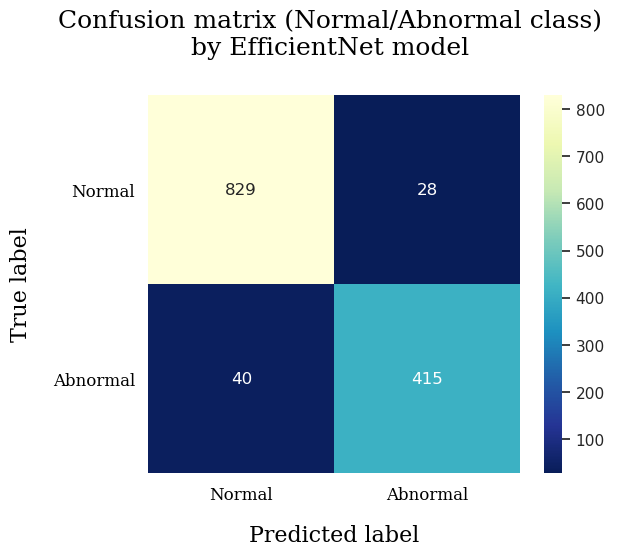

In [53]:

cm = [ [829,28] , [40, 415]]

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['Normal','Abnormal'])
fig, ax = plt.subplots(figsize=(6, 5), dpi=100)
ax = sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu_r") #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
ax.set_xticklabels(classes,fontsize=12, fontdict=font)
ax.set_yticklabels(classes,fontsize=12, fontdict=font)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
ax.set_title(f'Confusion matrix (Normal/Abnormal class) \n by EfficientNet model  ',fontsize=18, fontdict=font, pad=30)
ax.set_ylabel('True label',fontsize=16, fontdict=font, labelpad=15)
ax.set_xlabel('Predicted label',fontsize=16, fontdict=font, labelpad=15)

In [46]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}

In [2]:
import matplotlib.pyplot as plt

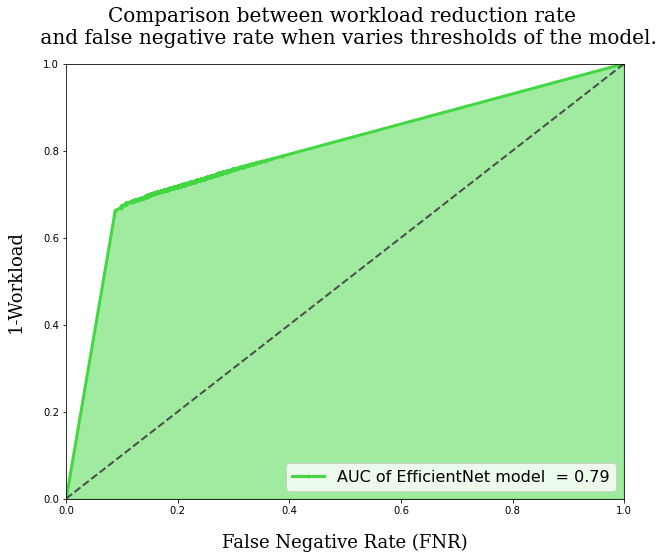

In [48]:
# Plot ROC
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))

plt.title('Comparison between workload reduction rate \n and false negative rate when varies thresholds of the model.',fontsize=20, fontdict=font, pad=20)

# plt.fill_between(FNR_, 1-WL_, color='#D73B00', alpha=0.5)
# plt.plot(FNR_, 1-WL_, color='#D73B00', marker='.', linewidth=3, label='AUC of EffNet+RF model = %0.2f'% area_)

plt.fill_between(FNR, 1-WL, color='#43D843', alpha=0.5)
plt.plot(FNR, 1-WL, color='#43D843', marker='.', linewidth=3, label='AUC of EfficientNet model  = %0.2f'% area)
# fig.suptitle('This is a somewhat \n long figure title', fontsize=16)
# plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='#4B4D4B', linestyle='--', linewidth=2)
plt.xlim([0.,1.0])
plt.ylim([0.,1.0])
plt.ylabel('1-Workload',fontsize=18, fontdict=font,  labelpad=18)
plt.xlabel('False Negative Rate (FNR)',fontsize=18, fontdict=font,  labelpad=18)
plt.legend(loc="lower right",fontsize=16)
plt.show()

### RF model 

In [3]:
#load model
import pickle
os.chdir('/media/tohn/SSD/ModelTrainByImages/R2_1/models/')
filename = "modelrf_EffNet5_b5_1FC_cross_15AB_15AB.pkl"
with open(filename, 'rb') as file:
    model = pickle.load(file)
    
dataframe_ = pd.read_csv( '/home/yupaporn/codes/result_model/FVtest_RF_15AB_1FC_3.csv')
dataframe_ = dataframe_.drop(['Unnamed: 0'], axis=1)

X_test = dataframe_.iloc[:,0:2048]
y_test = dataframe_.iloc[:,2051]

y_pred = model.predict(X_test)
y_prob =model.predict_proba(X_test)

y_probmax =[]
for i in range(len(y_prob)):
    a = y_prob[i]
    a = a[np.argmax(a)]
    y_probmax.append(a)
    
df0 = pd.read_csv ('/home/yupaporn/codes/USAI/Testdf.csv')
df0['15AB_category'] = y_pred
df0['15AB_Prob'] = y_probmax
df0['15AB_ProbAll'] = y_prob.tolist()

os.chdir( '/home/yupaporn/codes/result_model/')
# df0.to_csv('Testdf_prob_RF_15AB_1FC_3.csv')

In [4]:
RF = df0
ProbAll = df0['15AB_ProbAll'].tolist()
ab_prob = []
for i in ProbAll:
    ab = abs(1- i[14])
    ab_prob.append(ab)
    
category = RF['15AB_category'].map({'AB12':1, 'AB04':1, 'AB05':1, 'Normal':0, 'AB02':1, 'AB11':1, 'AB082':1, 'AB06':1,'AB07':1, 'AB081':1, 'AB09':1, 'AB03':1, 'AB10':1, 'AB01':1, 'AB083':1}).values
Class= RF['Class'].map({'Abnormal':1, 'Normal':0}).values
#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix

resdf = []
# threshold = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
threshold = np.arange(0, 1.0001, 0.0001).tolist()
TP, FP, TN, FN, Acc, Recall, Precision, TPR, FPR, SPEC, FNR, WL= [], [], [], [], [], [], [], [], [], [], [], []
for j in threshold:
    pre_ = []
    for i in ab_prob:
        if i  > j:
            pre_.append(1)
        else:
            pre_.append(0) 
    tn, fp, fn, tp = confusion_matrix(Class, pre_).ravel()
    pre = tp/(tp+fp)
    re= tp/(tp+fn)
    acc = (tp+tn)/(tp+tn+fp+fn)
    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)
    spec = 1-(tn/(tn+fp))
    fnr = 1-(tp/(tp+fn)) 
    wl = (fp+tp)/(tp+tn+fp+fn)
    resdf.append({'Threshold' : j,'TP' : tp,'FP' : fp,'TN' : tn,'FN' : fn, 'Acc' : acc, 'TPR' : tpr, 'FPR' : fpr, 'FNR' : fnr, 'SPEC' : spec, 'WL' : wl})
res_df_ = pd.DataFrame(resdf)
fix_value = [{'Threshold' : 0,'TP' :0,'FP' :0 ,'TN' : 0,'FN' : 0, 'Acc' : 0, 'TPR' : 1, 'FPR' : 1, 'FNR' : 0, 'SPEC' : 1, 'WL' : 1}]
res_df_ = res_df_.append(fix_value,ignore_index=True,sort=False)
res_df_ = res_df_.apply(np.roll, shift=1)
res_df_

/home/yupaporn/.local/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in long_scalars


,Threshold,TP,FP,TN,FN,Acc,TPR,FPR,FNR,SPEC,WL
0,0.0000,0,0,0,0,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
1,0.0000,454,428,429,1,0.673018,0.997802,0.499417,0.002198,0.499417,0.672256
2,0.0001,454,423,434,1,0.676829,0.997802,0.493582,0.002198,0.493582,0.668445
3,0.0002,454,423,434,1,0.676829,0.997802,0.493582,0.002198,0.493582,0.668445
4,0.0003,454,423,434,1,0.676829,0.997802,0.493582,0.002198,0.493582,0.668445
...,...,...,...,...,...,...,...,...,...,...,...
9997,0.9996,4,0,857,451,0.656250,0.008791,0.000000,0.991209,0.000000,0.003049
9998,0.9997,4,0,857,451,0.656250,0.008791,0.000000,0.991209,0.000000,0.003049
9999,0.9998,4,0,857,451,0.656250,0.008791,0.000000,0.991209,0.000000,0.003049
10000,0.9999,3,0,857,452,0.655488,0.006593,0.000000,0.993407,0.000000,0.002287


In [5]:
FNR_ = res_df_.FNR
WL_ = res_df_.WL

from sklearn.metrics import auc
area_ = auc(FNR_, 1-WL_)
print("Area Under Curve: %0.2f" % area_)

Area Under Curve: 0.82


In [6]:
FN_min = res_df_[(res_df_.FN != 0)]
FN_min_ = FN_min[FN_min.FN == FN_min.FN.min()]
FN_min__ = FN_min_[FN_min_.FP == FN_min_.FP.min()]
FN_min__

,Threshold,TP,FP,TN,FN,Acc,TPR,FPR,FNR,SPEC,WL
25,0.0024,454,397,460,1,0.696646,0.997802,0.463244,0.002198,0.463244,0.648628


In [7]:
tn, fp, fn, tp =460,397, 1, 454
wl = (fp+tp)/(tp+tn+fp+fn)
1 - wl

0.35137195121951215

Text(0.5, 28.75, 'Predicted label')

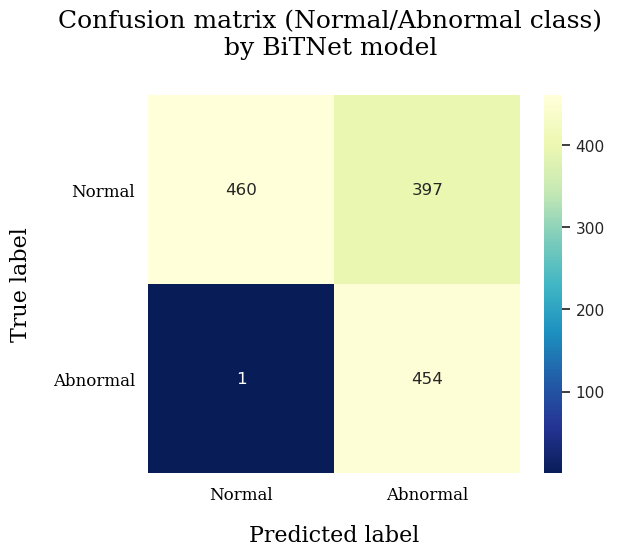

In [62]:
cm = [ [460,397] , [1, 454]]

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set()
classes = np.array(['Normal','Abnormal'])
fig, ax = plt.subplots(figsize=(6, 5), dpi=100)
ax = sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu_r") #Blues,Oranges,Reds,YlGnBu
ax.set(xticklabels=classes, yticklabels=classes)
ax.set_xticklabels(classes,fontsize=12, fontdict=font)
ax.set_yticklabels(classes,fontsize=12, fontdict=font)
plt.setp(ax.get_yticklabels(), rotation=0, ha="right")
ax.set_title(f'Confusion matrix (Normal/Abnormal class) \n by BiTNet model  ',fontsize=18, fontdict=font, pad=30)
ax.set_ylabel('True label',fontsize=16, fontdict=font, labelpad=15)
ax.set_xlabel('Predicted label',fontsize=16, fontdict=font, labelpad=15)

In [8]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}

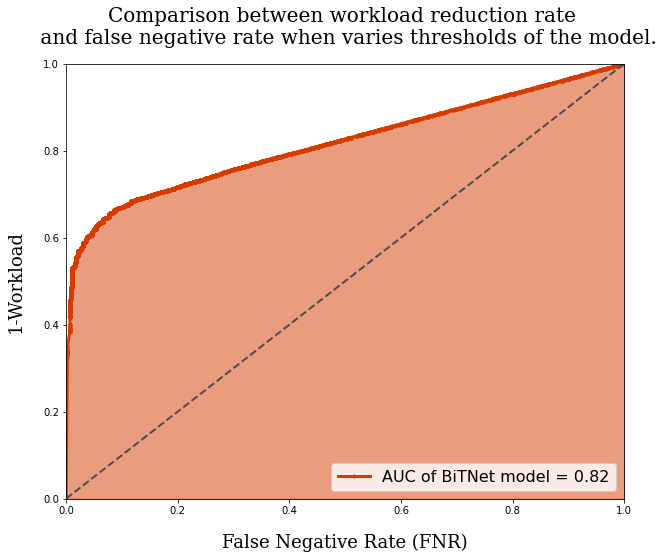

In [10]:
# Plot ROC
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))

plt.title('Comparison between workload reduction rate \n and false negative rate when varies thresholds of the model.',fontsize=20, fontdict=font, pad=20)

plt.fill_between(FNR_, 1-WL_, color='#D73B00', alpha=0.5)
plt.plot(FNR_, 1-WL_, color='#D73B00', marker='.', linewidth=3, label='AUC of BiTNet model = %0.2f'% area_)

# plt.fill_between(FNR, 1-WL, color='#43D843', alpha=0.5)
# plt.plot(FNR, 1-WL, color='#43D843', marker='.', linewidth=3, label='AUC of EfficientNet model  = %0.2f'% area)

plt.plot([0,1],[0,1],color='#4B4D4B', linestyle='--', linewidth=2)
plt.xlim([0.,1.0])
plt.ylim([0.,1.0])
plt.ylabel('1-Workload',fontsize=18, fontdict=font,  labelpad=18)
plt.xlabel('False Negative Rate (FNR)',fontsize=18, fontdict=font,  labelpad=18)
plt.legend(loc="lower right",fontsize=16)
plt.show()

## workload:

In [17]:
import matplotlib.pyplot as plt

In [18]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal'}

TypeError: unsupported operand type(s) for -: 'int' and 'list'

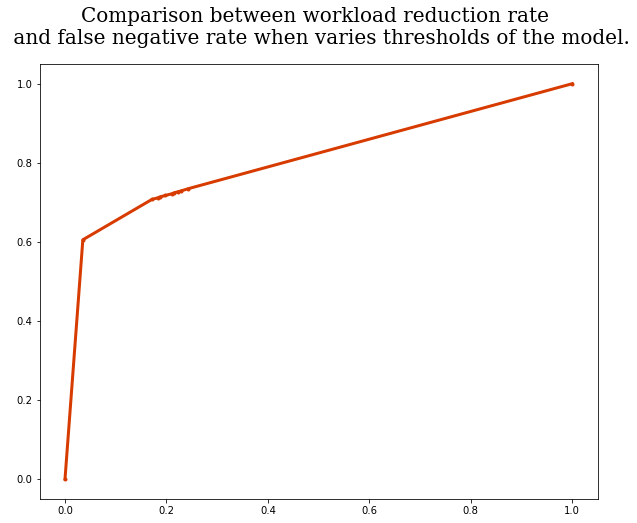

In [19]:
# Plot ROC
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))

plt.title('Comparison between workload reduction rate \n and false negative rate when varies thresholds of the model.',fontsize=20, fontdict=font, pad=20)
plt.plot(FNR_, 1-WL_, color='#D73B00', marker='.', linewidth=3, label='AUC of BiTnet model = %0.2f'% area_)

# plt.fill_between(FNR, 1-WL, color='#43D843', alpha=1.0)
plt.plot(FNR, 1-WL, color='#43D843', marker='.', linewidth=3, label='AUC of EfficientNet model  = %0.2f'% area)
# fig.suptitle('This is a somewhat \n long figure title', fontsize=16)
# plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='#4B4D4B', linestyle='--', linewidth=2)
plt.xlim([0.,1.0])
plt.ylim([0.,1.0])
plt.ylabel('1-Workload',fontsize=18, fontdict=font,  labelpad=18)
plt.xlabel('False Negative Rate (FNR)',fontsize=18, fontdict=font,  labelpad=18)
pyplot.legend(loc="lower right",fontsize=16)
plt.show()

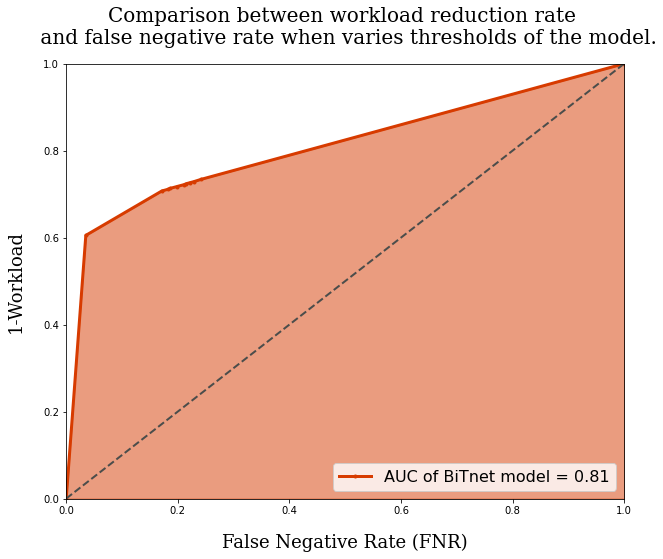

In [19]:
# Plot ROC
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))

plt.title('Comparison between workload reduction rate \n and false negative rate when varies thresholds of the model.',fontsize=20, fontdict=font, pad=20)

plt.fill_between(FNR_, 1-WL_, color='#D73B00', alpha=0.5)
plt.plot(FNR_, 1-WL_, color='#D73B00', marker='.', linewidth=3, label='AUC of BiTnet model = %0.2f'% area_)

# plt.fill_between(FNR, 1-WL, color='#43D843', alpha=1.0)
# plt.plot(FNR, 1-WL, color='#43D843', marker='.', linewidth=3, label='AUC of EffNet model  = %0.2f'% area)
# fig.suptitle('This is a somewhat \n long figure title', fontsize=16)
# plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='#4B4D4B', linestyle='--', linewidth=2)
plt.xlim([0.,1.0])
plt.ylim([0.,1.0])
plt.ylabel('1-Workload',fontsize=18, fontdict=font,  labelpad=18)
plt.xlabel('False Negative Rate (FNR)',fontsize=18, fontdict=font,  labelpad=18)
plt.legend(loc="lower right",fontsize=16)
plt.show()

TypeError: unsupported operand type(s) for -: 'int' and 'list'

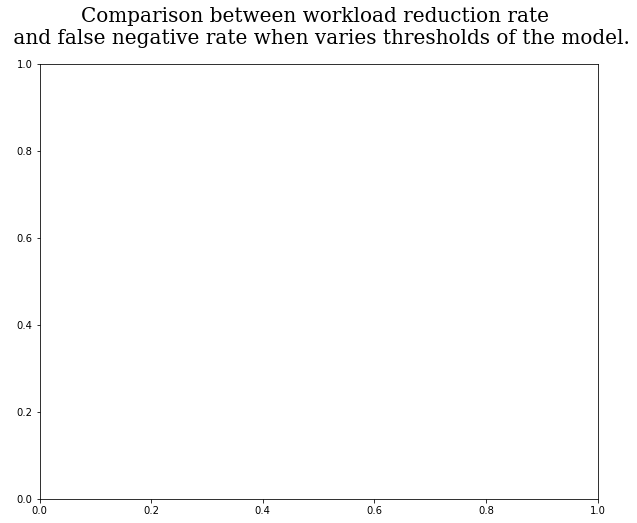

In [20]:
# Plot ROC
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))

plt.title('Comparison between workload reduction rate \n and false negative rate when varies thresholds of the model.',fontsize=20, fontdict=font, pad=20)

# plt.fill_between(FNR_, 1-WL_, color='#D73B00', alpha=0.5)
# plt.plot(FNR_, 1-WL_, color='#D73B00', marker='.', linewidth=3, label='AUC of EffNet+RF model = %0.2f'% area_)

plt.fill_between(FNR, 1-WL, color='#43D843', alpha=0.5)
plt.plot(FNR, 1-WL, color='#43D843', marker='.', linewidth=3, label='AUC of EfficientNet model  = %0.2f'% area)
# fig.suptitle('This is a somewhat \n long figure title', fontsize=16)
# plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='#4B4D4B', linestyle='--', linewidth=2)
plt.xlim([0.,1.0])
plt.ylim([0.,1.0])
plt.ylabel('1-Workload',fontsize=18, fontdict=font,  labelpad=18)
plt.xlabel('False Negative Rate (FNR)',fontsize=18, fontdict=font,  labelpad=18)
plt.legend(loc="lower right",fontsize=16)
plt.show()

TypeError: unsupported operand type(s) for -: 'int' and 'list'

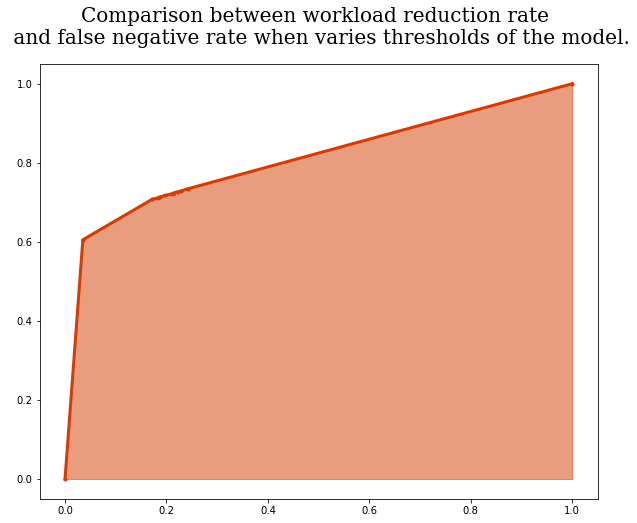

In [21]:
# Plot ROC
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))

plt.title('Comparison between workload reduction rate \n and false negative rate when varies thresholds of the model.',fontsize=20, fontdict=font, pad=20)

plt.fill_between(FNR_, 1-WL_, color='#D73B00', alpha=0.5)
plt.plot(FNR_, 1-WL_, color='#D73B00', marker='.', linewidth=3, label='AUC of BiTnet model = %0.2f'% area_)

plt.fill_between(FNR, 1-WL, color='#43D843', alpha=0.5)
plt.plot(FNR, 1-WL, color='#43D843', marker='.', linewidth=3, label='AUC of EfficientNet model  = %0.2f'% area)

plt.plot([0,1],[0,1],color='#4B4D4B', linestyle='--', linewidth=2)
plt.xlim([0.,1.0])
plt.ylim([0.,1.0])
plt.ylabel('1-Workload',fontsize=18, fontdict=font,  labelpad=18)
plt.xlabel('False Negative Rate (FNR)',fontsize=18, fontdict=font,  labelpad=18)
plt.legend(loc="lower right",fontsize=16)
plt.show()